In [1]:
#General Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

In [3]:
#Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

Membaca Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')

In [6]:
sentiment_twitter = pd.read_csv('/content/drive/MyDrive/datasettwt/Twitter_Data.csv')
sentiment_twitter.head()

,clean_text,category,sentiment
0,Semoga jessika bisa dibebaskan kalau tidak ber...,1,positive
1,Jadi siapa pembunuhnya kalo bukan jessica?,0,neutral
2,Gue lbh penasaran sama cerita aslinya di balik...,0,neutral
3,bahkan sidang dia rasanya lebih lama dari sida...,0,neutral
4,I wonder how social media influenced the inves...,0,neutral


Panjang kalimat per postingan.

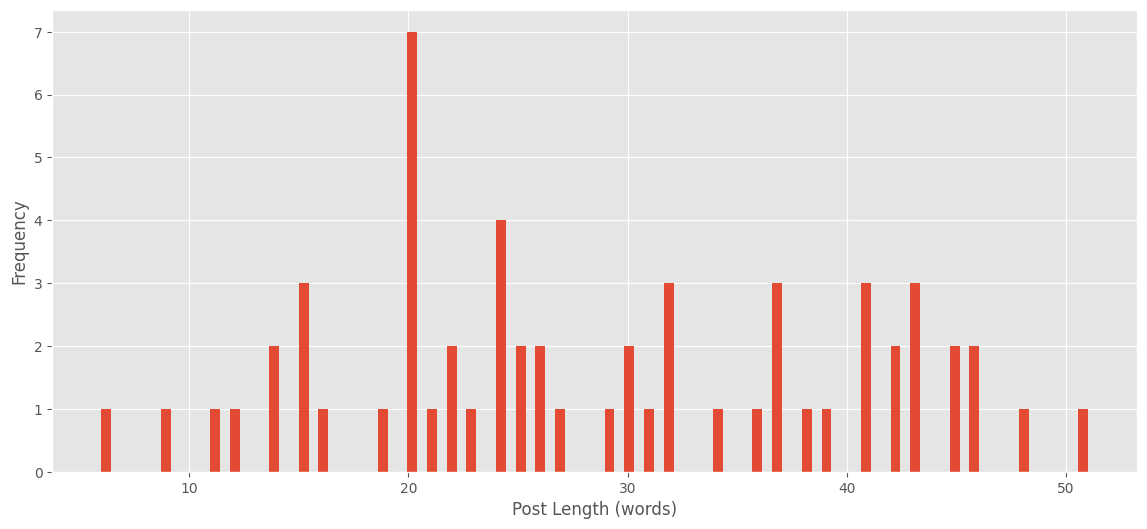

In [7]:
words_per_post = sentiment_twitter.clean_text.apply(lambda x: len(str(x).split(" ")))
words_per_post.hist(bins = 100)
plt.xlabel('Post Length (words)')
plt.ylabel('Frequency')
plt.show()

In [8]:
print('Average words: ', words_per_post.mean())
print('Skewness: ', words_per_post.skew())

Average words:  28.64406779661017
Skewness:  0.10739170177530757


Visualisasi dalam tabel statistik

<Axes: xlabel='sentiment', ylabel='count'>

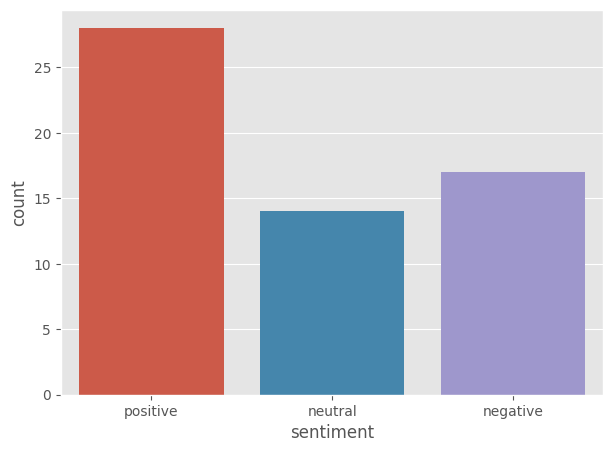

In [9]:
fig = plt.figure(figsize=(7,5))
sns.countplot(x='sentiment', data=sentiment_twitter)

Visualisasi dengan diagram

Text(0.5, 1.0, 'Distribution of sentiments')

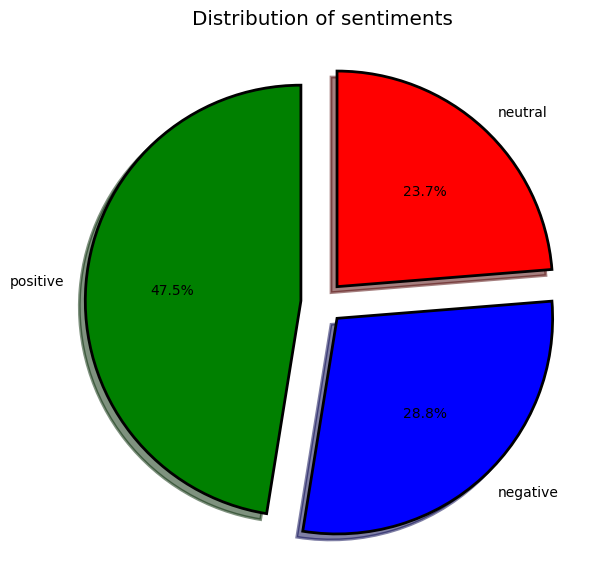

In [10]:
fig = plt.figure(figsize=(7,7))
colors = ("green", "blue", "red")
wp = {'linewidth':2, 'edgecolor' : "black"}
tags = sentiment_twitter['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

Visualisasi dengan Word Cloud

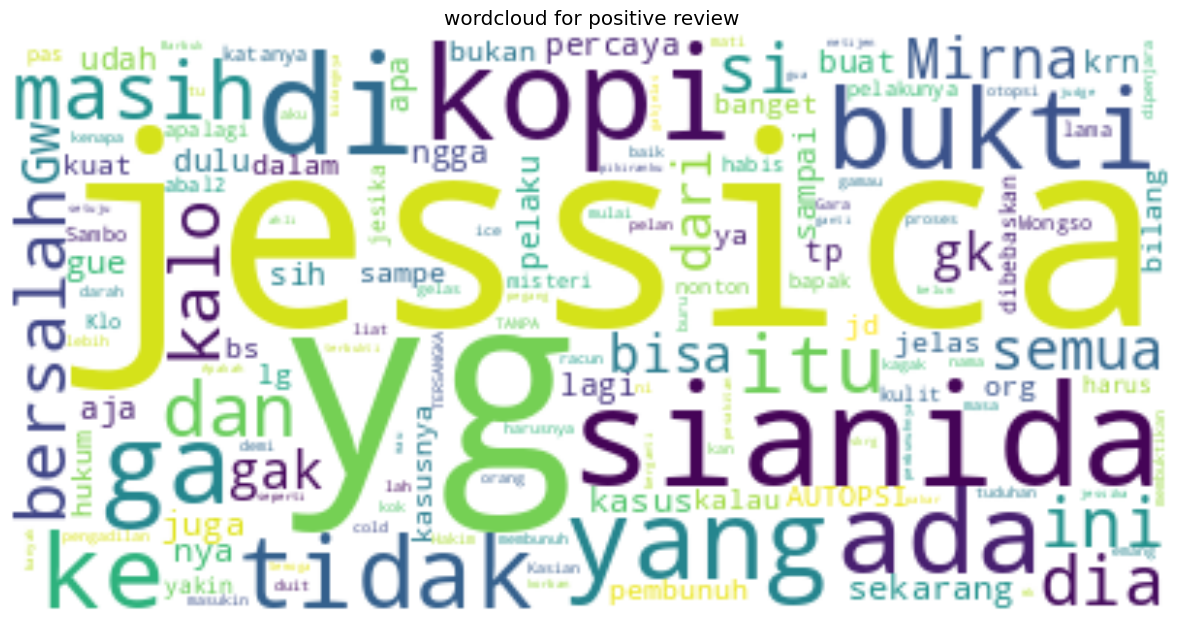

In [11]:
text = " ".join(i for i in sentiment_twitter[sentiment_twitter['sentiment']=='positive']['clean_text'])
wordcloud = WordCloud( background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

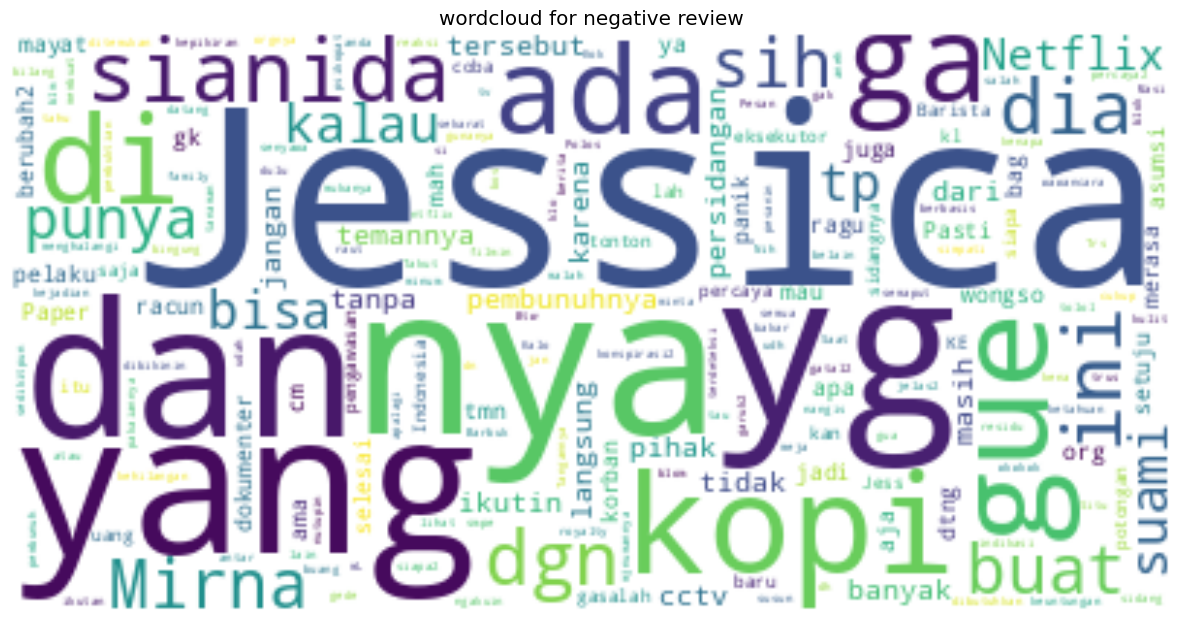

In [12]:
text = " ".join(i for i in sentiment_twitter[sentiment_twitter['sentiment']=='negative']['clean_text'])
#stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

In [13]:
sentiment_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   clean_text  59 non-null     object
 1   category    59 non-null     int64 
 2   sentiment   59 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


**Modeling**

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [97]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
from sklearn.pipeline import Pipeline
classifier_knn = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', KNeighborsClassifier()),
])

In [100]:
hasil = np.arange(1, 30, 2, dtype=int)
hasil

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [101]:
parameters_knn = {
               'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4),(2,3),(2,4),(3,4)],
               'tfidf__use_idf': (True, False),
               'model__n_neighbors': np.arange(1, 30, 2, dtype=int)}

In [102]:
classifier_knn = GridSearchCV(classifier_knn, parameters_knn, cv = 3, n_jobs=-1)

In [103]:
classifier_knn.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4),
                                                (2, 3), (2, 4), (3, 4)],
                         'tfidf__use_idf': (True, False)})

In [104]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Accuracy Training set: ", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Accuracy Test set: ", accuracy_knn_test)

Accuracy Training set:  0.4146341463414634
Accuracy Test set:  0.5


In [138]:
recall_knn_train = recall_score(y_train, y_pred_knn_train, average='weighted')
print("Recall Training set: ", recall_knn_train)

recall_knn_test = recall_score(y_test, y_pred_knn_test, average='weighted')
print("Recall Test set: ", recall_knn_test)

Recall Training set:  0.4146341463414634
Recall Test set:  0.5


In [139]:
precision_knn_train = precision_score(y_train, y_pred_knn_train, average='weighted')
print("Precision Training set: ", precision_knn_train)

recision_knn_test = precision_score(y_test, y_pred_knn_test, average='weighted')
print("Precision Test set: ", precision_knn_test)

Precision Training set:  0.2129202373104812
Precision Test set:  0.25


In [140]:
f1_knn_train = f1_score(y_train, y_pred_knn_train, average='weighted')
print("F1 Training set: ", f1_knn_train)

f1_knn_test = f1_score(y_test, y_pred_knn_test, average='weighted')
print("F1 Test set: ", f1_knn_test)

F1 Training set:  0.2813588850174216
F1 Test set:  0.3333333333333333


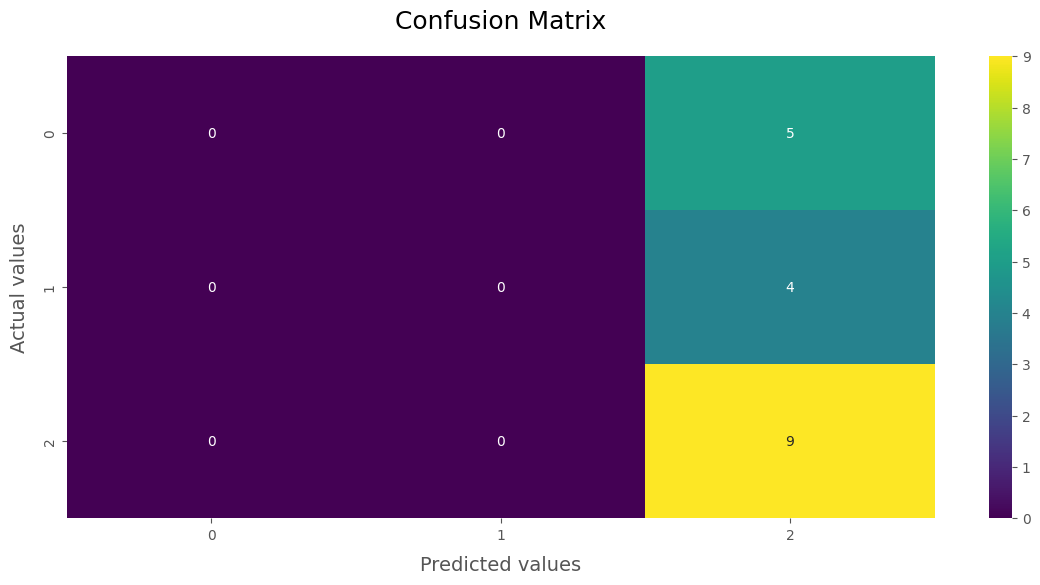

In [141]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_knn_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [142]:
classifier_knn.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(2, 3), use_idf=False)),
                ('model', KNeighborsClassifier(n_neighbors=15))])

In [143]:
for param_name in sorted(parameters_knn.keys()):
    print("%s: %r" % (param_name, classifier_knn.best_params_[param_name]))

model__n_neighbors: 15
tfidf__ngram_range: (2, 3)
tfidf__use_idf: False


Naive Bayes

In [110]:
from sklearn.naive_bayes import MultinomialNB

In [111]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [112]:
parameters_nb = {
               'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
               'tfidf__use_idf': (True, False),
               'model__alpha': (0, 1, 1e-2, 1e-3)
}

In [113]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [114]:
classifier_nb.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
                         'tfidf__use_idf': (True, False)})

In [116]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  1.0
Accuracy Test set:  0.5


In [117]:
recall_nb_train = recall_score(y_train, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(y_test, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  1.0
Recall Test set:  0.5


In [118]:
precision_nb_train = precision_score(y_train, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(y_test, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  1.0
Precision Test set:  0.25


In [119]:
f1_nb_train = f1_score(y_train, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(y_test, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  1.0
F1 Test set:  0.3333333333333333


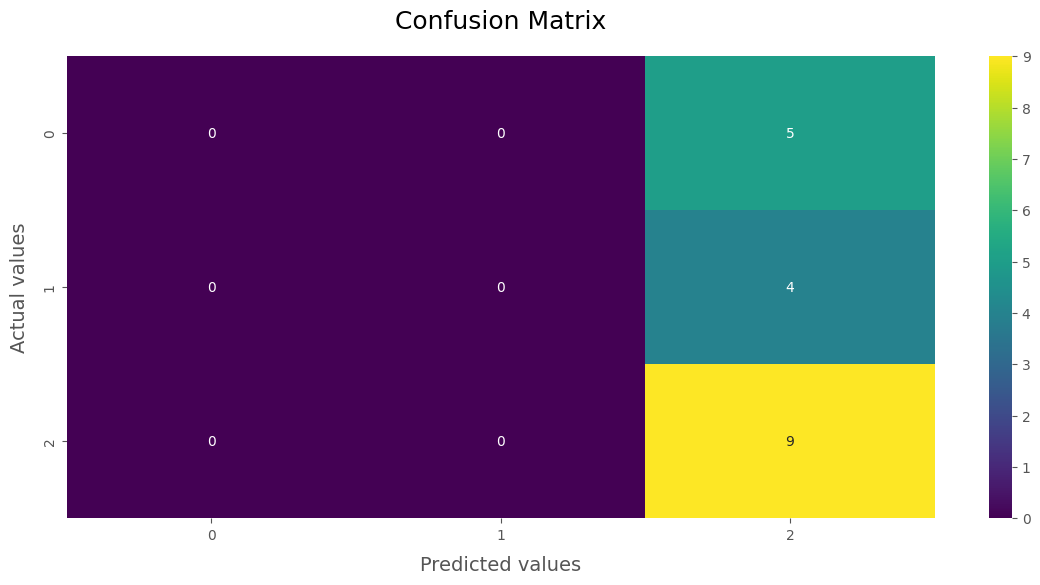

In [120]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [121]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('model', MultinomialNB(alpha=1))])

In [122]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 1
tfidf__ngram_range: (1, 2)
tfidf__use_idf: True


Logistic Regression

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
from sklearn.pipeline import Pipeline
classifier_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', LogisticRegression()),
])

In [125]:
parameters_lr = {
               'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
               'tfidf__use_idf': (True, False),
               'model__C': [0.01, 0.1, 1, 10, 100]
}

In [126]:
classifier_lr = GridSearchCV(classifier_lr, parameters_lr, cv = 3, n_jobs=-1)

In [127]:
classifier_lr.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10, 100],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
                         'tfidf__use_idf': (True, False)})

In [128]:
y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Accuracy Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Accuracy Test set: ", accuracy_lr_test)

Accuracy Training set:  0.4634146341463415
Accuracy Test set:  0.5


In [129]:
recall_lr_train = recall_score(y_train, y_pred_lr_train, average='weighted')
print("Recall Training set: ", recall_lr_train)

recall_lr_test = recall_score(y_test, y_pred_lr_test, average='weighted')
print("Recall Test set: ", recall_lr_test)

Recall Training set:  0.4634146341463415
Recall Test set:  0.5


In [130]:
precision_lr_train = precision_score(y_train, y_pred_lr_train, average='weighted')
print("Precision Training set: ", precision_lr_train)

precision_lr_test = precision_score(y_test, y_pred_lr_test, average='weighted')
print("Precision Test set: ", precision_lr_test)

Precision Training set:  0.2147531231409875
Precision Test set:  0.25


In [131]:
f1_lr_train = f1_score(y_train, y_pred_lr_train, average='weighted')
print("F1 Training set: ", f1_lr_train)

f1_lr_test = f1_score(y_test, y_pred_lr_test, average='weighted')
print("F1 Test set: ", f1_lr_test)

F1 Training set:  0.2934959349593496
F1 Test set:  0.3333333333333333


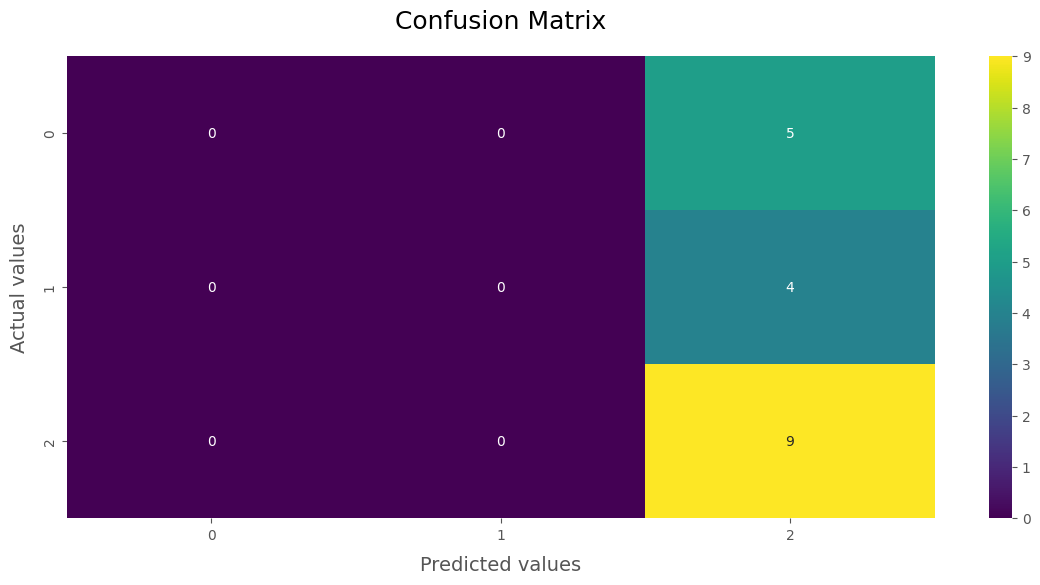

In [132]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [133]:
classifier_lr.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', LogisticRegression(C=0.01))])

In [134]:
for param_name in sorted(parameters_lr.keys()):
    print("%s: %r" % (param_name, classifier_lr.best_params_[param_name]))

model__C: 0.01
tfidf__ngram_range: (1, 1)
tfidf__use_idf: True


**Visualisasi Komparasi Akurasi**

In [135]:
models = [
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
          ('KNN', accuracy_knn_train, accuracy_knn_test),
          ('Logistic Regression', accuracy_lr_train, accuracy_lr_test)
         ]

In [136]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,1.000000,0.5
1,KNN,0.414634,0.5
2,Logistic Regression,0.463415,0.5


In [144]:
models_comparison = [
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test),
                        ('KNN', accuracy_knn_test, recall_knn_test, precision_knn_test, f1_knn_test),
                        ('Logistic Regression', accuracy_lr_test, recall_lr_test, precision_lr_test, f1_lr_test)
                    ]

In [145]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model Testing', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model Testing,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.5,0.5,0.25,0.333333
1,KNN,0.5,0.5,0.25,0.333333
2,Logistic Regression,0.5,0.5,0.25,0.333333


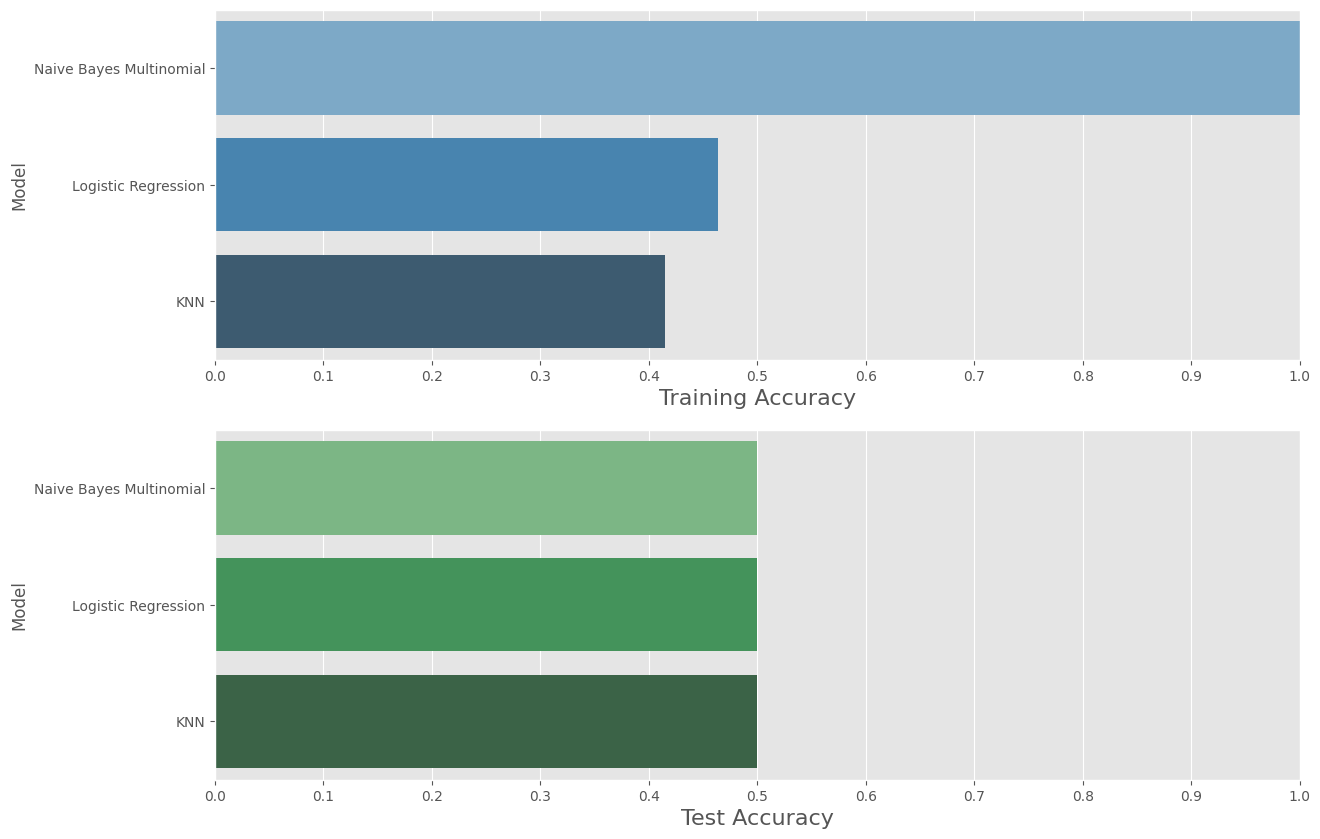

In [146]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

In [158]:
# Contoh kalimat review yang ingin Anda prediksi
new_sentiment = ["Semoga jessika bisa dibebaskan kalau tidak bersalah.. mau udah mk.. kalau terbukti gak bersalah harus dibebaskan.."]

# Gunakan model Naive Bayes untuk melakukan prediksi
predicted_sentiment = classifier_nb.predict(new_sentiment)

# Print hasil prediksi
if predicted_sentiment[0] == -1:
    print("Sentimen Negatif")
else:
    print("Sentimen Positif")


Sentimen Positif


In [154]:
# Contoh kalimat review yang ingin Anda prediksi
new_sentiment = ["Kalo cm asumsi semua org juga bisa. Yang dibutuhkan pembuktian. Situ ikutin sidang nya? Barbuk berubah2 udah tahu? mL kopi nya berubah2. Dan gk ditemukan senyawa pembunuh nya di mayat korban. Gk belain siapa2, tp klo persidangan cm berbasis asumsi, apa gunanya persidangan?"]

# Gunakan model Naive Bayes untuk melakukan prediksi
predicted_sentiment = classifier_nb.predict(new_sentiment)

# Print hasil prediksi
if predicted_sentiment[0] == 1:
    print("Sentimen Positif")
else:
    print("Sentimen Negatif")

Sentimen Negatif


In [167]:
import pickle

In [169]:
pickle.dump(classifier_knn, open('model_knn.pkl', 'wb'))